In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
n=np.random.randint(1000)
k=np.array(np.random.randint(-1,0,n).tolist()+np.random.randint(1,2,999-n).tolist())
np.random.shuffle(k)

k1=np.array([0]+k.tolist())

k2=k1.cumsum()

### Минимальное и максимальное значение по траектории

In [3]:
MAX=max(k2)
MIN=min(k2)
imax=np.where(k2==MAX)
imin=np.where(k2==MIN)
print("1. a)Max по траектории:",MAX,", таких точек:",len(imax[0]))
print("1. b)Min по траектории:",MIN,", таких точек:",len(imin[0]))

1. a)Max по траектории: 0 , таких точек: 1
1. b)Min по траектории: -585 , таких точек: 2


### Найдем первый момент времени, когда на прогулке было сделано более 10 шагов в одну сторону

In [4]:
l=1
for i in np.arange(len(k)):
    if l==10:
        print("2. Первый раз прошел 10 шагов в одну сторону, начиная с",i-8,"шага, и до",i+1,"шага")
        break
    elif i==(len(k)-1):
        print("2. Нигде не проходит 10 шагов в одну сторону")
    else:
        if k[i]==k[i+1]:
            l=l+1
        else:
            l=1

2. Первый раз прошел 10 шагов в одну сторону, начиная с 9 шага, и до 18 шага


### Найдем максимальное количество шагов в одну сторону

In [5]:
l=1
h=[]
for i in np.arange(len(k)):
    if i==(len(k)-1):
        h.append(l)
        break
    if k[i]==k[i+1]:
        l=l+1
    else:
        h.append(l)
        l=1
print("3. Max кол-во шагов в одну сторону равно",max(h),
      "начиная с",sum(h[:h.index(max(h))])+1,"шага, и до",sum(h[:h.index(max(h))])+max(h)+1,"шага")

3. Max кол-во шагов в одну сторону равно 20 начиная с 585 шага, и до 605 шага


### Визуальное решение (график)

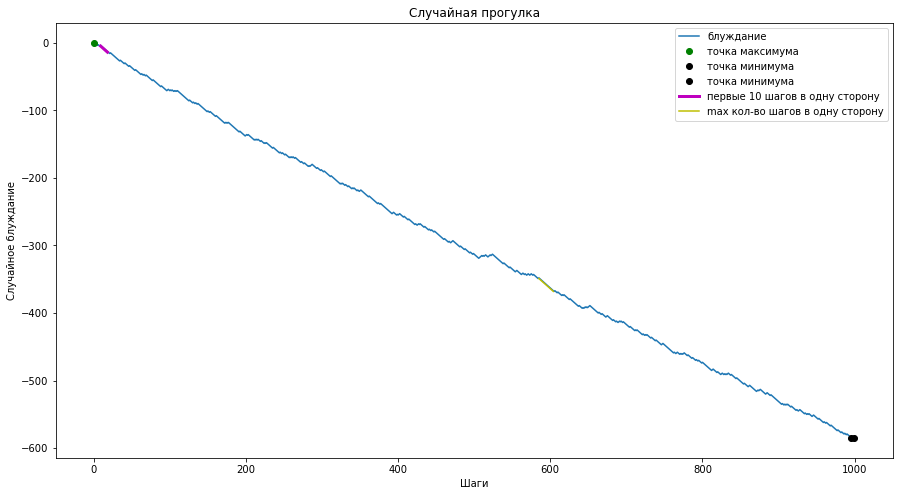

In [6]:
fig = plt.figure()
fig.set_size_inches(15, 8)
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Случайная прогулка')
ax.set_xlabel('Шаги')
ax.set_ylabel('Случайное блуждание')
ax.plot(np.arange(1,1001),k2,label="блуждание");
ax.plot(imax,MAX,"go",label="точка максимума");
ax.plot(imin,MIN,"ko",label="точка минимума");

l=1
for i in np.arange(len(k)):
    if l==10:
        ax.plot(np.arange(i-8,i+2),k2[i-8:i+2],"m",lw=3,label="первые 10 шагов в одну сторону");
        break
    elif i==(len(k)-1):
        print("Нигде не проходит 10 шагов в одну сторону, нельзя построить график :(")
    else:
        if k[i]==k[i+1]:
            l=l+1
        else:
            l=1

p=np.arange((sum(h[:h.index(max(h))])+1),(sum(h[:h.index(max(h))])+max(h)+1))
ax.plot(p,k2[(sum(h[:h.index(max(h))])+1):(sum(h[:h.index(max(h))])+max(h)+1)],"y",label="max кол-во шагов в одну сторону");
ax.legend(loc='best');